# IMPORTING DEPENDENCIES

In [1]:
# Python
import pandas as pd
from prophet import Prophet
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

# IMPORTING DATA

In [2]:
Dcoilwtico_Dataframe = pd.read_csv('oil.csv')

# BRIEF ANALYSIS OF THE DATAFRAME

In [3]:
Dcoilwtico_Dataframe.head()

,ds,y
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [4]:
Dcoilwtico_Dataframe.tail()

,ds,y
1213,2017-08-25,47.65
1214,2017-08-28,46.40
1215,2017-08-29,46.46
1216,2017-08-30,45.96
1217,2017-08-31,47.26


In [5]:
# Information On Dataframe
Dcoilwtico_Dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ds      1218 non-null   object 
 1   y       1175 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.2+ KB


In [6]:
# Summary Statistics of the dataframe
Dcoilwtico_Dataframe.describe()

,y
count,1175.000000
mean,67.714366
std,25.630476
min,26.190000
25%,46.405000
50%,53.190000
75%,95.660000
max,110.620000


In [8]:
# Shape of the dataframe
Dcoilwtico_Dataframe.shape

(1218, 2)

# CLEANING OF THE DATAFRAME
        # Checking for Missing values and duplicates
        # Structural Manuplation Of the dataframe
        # Data transformation

# Checking for Missing values and duplicates

In [9]:
# Missing values in cells/rows
Dcoilwtico_Dataframe.isna()

,ds,y
0,False,True
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
1213,False,False
1214,False,False
1215,False,False
1216,False,False


In [10]:
# Removing Missing Values
Dcoilwtico_Dataframe.dropna(inplace=True)

In [12]:
# Missing Values in columns
Dcoilwtico_Dataframe.isna().any()

ds    False
y     False
dtype: bool

In [13]:
# Duplicates in rows
Dcoilwtico_Dataframe.duplicated()

1       False
2       False
3       False
4       False
5       False
        ...  
1213    False
1214    False
1215    False
1216    False
1217    False
Length: 1175, dtype: bool

In [14]:
# Duplicates in columns
Dcoilwtico_Dataframe.duplicated().any()

False

# Data transformation
    # converting data types

In [15]:
Dcoilwtico_Dataframe['ds'] = pd.to_datetime(Dcoilwtico_Dataframe['ds'],format="%Y/%m/%d")

# BUILDING AND TRAINING THE MODEL FOR PREDICTION FORECASTING

In [16]:
m = Prophet(interval_width=0.95, daily_seasonality=True)

# FIT THE MODEL FOR PREDICTIONS FORECASTING

In [17]:
m.fit(Dcoilwtico_Dataframe)

19:30:56 - cmdstanpy - INFO - Chain [1] start processing
19:30:57 - cmdstanpy - INFO - Chain [1] done processing


# FORECASTING AWAY

In [21]:
future = m.make_future_dataframe(periods=3285, freq='D') # forecasting changed to 3285 days

In [22]:
Forecast = m.predict(future)

# DISPALYING HEAD OF THE FORECASTING PREDICTIONS

In [24]:
Forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-02,92.594803,85.433975,99.446408,92.594803,92.594803,0.193373,0.193373,0.193373,3.695199,...,0.189168,0.189168,0.189168,-3.690994,-3.690994,-3.690994,0.0,0.0,0.0,92.788176
1,2013-01-03,92.565821,85.030386,99.752789,92.565821,92.565821,0.104552,0.104552,0.104552,3.695199,...,0.247466,0.247466,0.247466,-3.838113,-3.838113,-3.838113,0.0,0.0,0.0,92.670373
2,2013-01-04,92.536839,85.258061,99.323451,92.536839,92.536839,-0.090773,-0.090773,-0.090773,3.695199,...,0.195554,0.195554,0.195554,-3.981526,-3.981526,-3.981526,0.0,0.0,0.0,92.446066
3,2013-01-07,92.449894,85.211721,98.829699,92.449894,92.449894,-0.561315,-0.561315,-0.561315,3.695199,...,0.106963,0.106963,0.106963,-4.363478,-4.363478,-4.363478,0.0,0.0,0.0,91.888578
4,2013-01-08,92.420912,84.631062,98.658975,92.420912,92.420912,-0.586556,-0.586556,-0.586556,3.695199,...,0.184649,0.184649,0.184649,-4.466404,-4.466404,-4.466404,0.0,0.0,0.0,91.834356


# DISPALYING TAIL OF THE FORECASTING PREDICTIONS

In [25]:
Forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
4455,2026-08-25,22.761370,-1555.796643,1583.210157,-1556.886660,1578.726689,3.797482,3.797482,3.797482,3.695199,...,0.184649,0.184649,0.184649,-0.082365,-0.082365,-0.082365,0.0,0.0,0.0,26.558853
4456,2026-08-26,22.755001,-1549.957522,1582.070474,-1557.693597,1579.950966,3.948900,3.948900,3.948900,3.695199,...,0.189168,0.189168,0.189168,0.064532,0.064532,0.064532,0.0,0.0,0.0,26.703900
4457,2026-08-27,22.748631,-1549.376275,1585.293466,-1558.500535,1581.175244,4.154572,4.154572,4.154572,3.695199,...,0.247466,0.247466,0.247466,0.211907,0.211907,0.211907,0.0,0.0,0.0,26.903203
4458,2026-08-28,22.742261,-1557.146076,1582.332670,-1559.307472,1582.399521,4.247790,4.247790,4.247790,3.695199,...,0.195554,0.195554,0.195554,0.357037,0.357037,0.357037,0.0,0.0,0.0,26.990051
4459,2026-08-29,22.735891,-1552.989674,1586.852973,-1560.114410,1583.262786,3.730612,3.730612,3.730612,3.695199,...,-0.461900,-0.461900,-0.461900,0.497313,0.497313,0.497313,0.0,0.0,0.0,26.466503


# PLOTING OR VISUALIZING FORECASTING PREDICTIONS 

Text(62.972222222222214, 0.5, 'dcoilwtico')

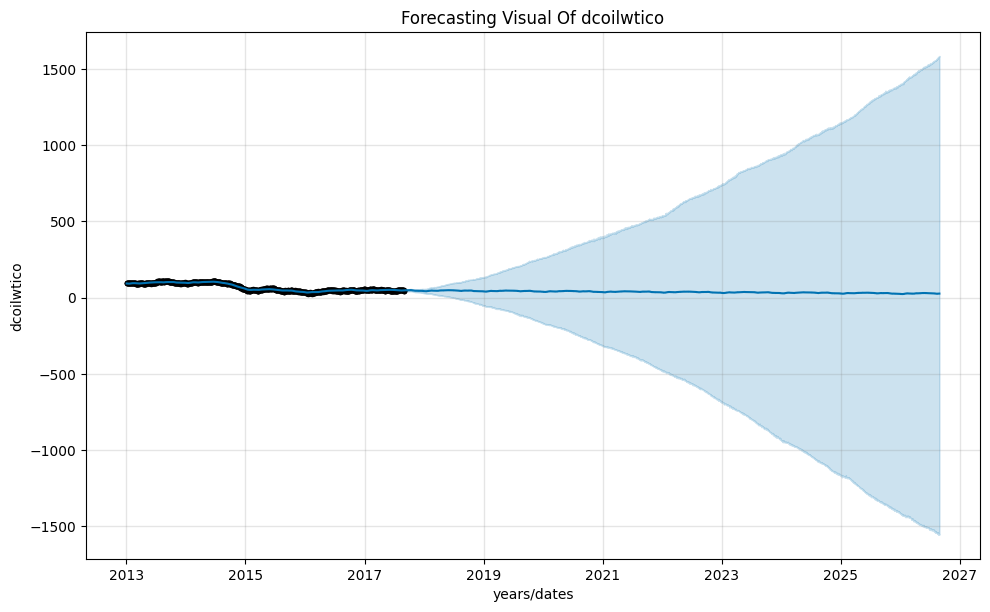

In [27]:
Main_Plot = m.plot(Forecast)
plt.title('Forecasting Visual Of dcoilwtico')
plt.xlabel('years/dates')
plt.ylabel('dcoilwtico')

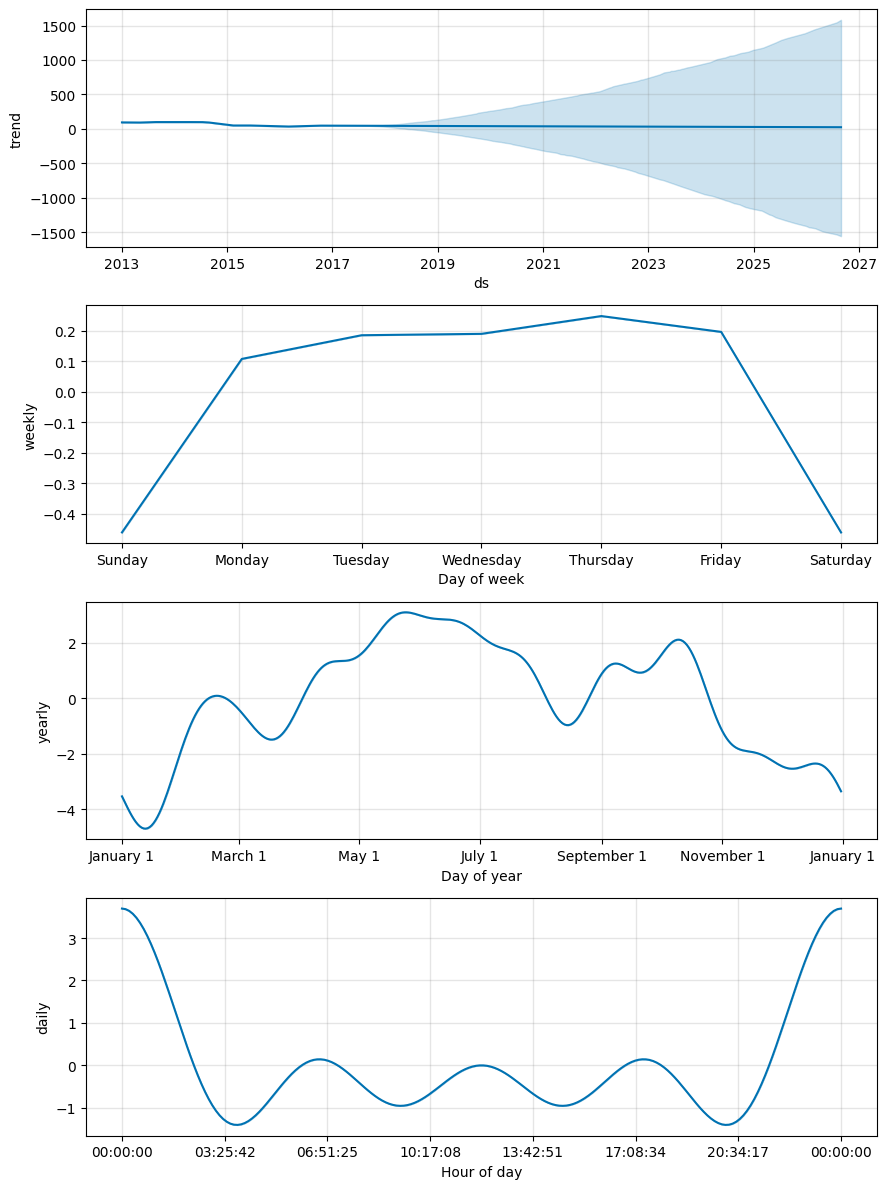

In [28]:
Components_Plot = m.plot_components(Forecast)